In [1]:
import pandas as pd
import numpy as np
import os 
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st



In [2]:
file1 = "c://Learn//Project1//Resources//Seattle_calendar1.xlsx"
Seattle_df1 = pd.read_excel(file1)
Seattle_df1.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
import math
Seattle_df1.describe()

,listing_id,price
count,5.222380e+05,348432.000000
mean,5.522758e+06,152.202599
std,2.941194e+06,121.442776
min,6.606000e+03,12.000000
25%,3.291295e+06,83.000000
50%,6.004058e+06,117.000000
75%,8.029177e+06,175.000000
max,1.031037e+07,1650.000000


In [4]:
Seattle_df1 = Seattle_df1.dropna(how="any")
Seattle_df1.count()

listing_id    348432
date          348432
available     348432
price         348432
dtype: int64

In [5]:
file2 = "c://Learn//Project1//Resources//Seattle_calendar2.xlsx"
Seattle_df2 = pd.read_excel(file2)
Seattle_df2.head()

,listing_id,date,available,price
0,6850007,2016-10-18,t,130.0
1,6850007,2016-10-19,t,130.0
2,6850007,2016-10-20,t,130.0
3,6850007,2016-10-21,t,130.0
4,6850007,2016-10-22,t,130.0


In [6]:
df_final_Seattle = pd.concat([Seattle_df1, Seattle_df2])

df_final_Seattle.count()

listing_id    874769
date          874769
available     874769
price         699862
dtype: int64

In [7]:
df_final_Seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [8]:
df_final_Seattle['year'] = df_final_Seattle['date'].dt.year
df_final_Seattle.head()

,listing_id,date,available,price,year
0,241032,2016-01-04,t,85.0,2016
1,241032,2016-01-05,t,85.0,2016
9,241032,2016-01-13,t,85.0,2016
10,241032,2016-01-14,t,85.0,2016
14,241032,2016-01-18,t,85.0,2016


In [9]:
df_final_Seattle['Location'] = 'Seattle'
df_final_Seattle.head()

,listing_id,date,available,price,year,Location
0,241032,2016-01-04,t,85.0,2016,Seattle
1,241032,2016-01-05,t,85.0,2016,Seattle
9,241032,2016-01-13,t,85.0,2016,Seattle
10,241032,2016-01-14,t,85.0,2016,Seattle
14,241032,2016-01-18,t,85.0,2016,Seattle


In [10]:
df_final_Seattle.count()

listing_id    874769
date          874769
available     874769
price         699862
year          874769
Location      874769
dtype: int64

In [11]:
df_final_Seattle.fillna(method = "bfill", inplace = True)

In [12]:
df_final_Seattle.count()

listing_id    874769
date          874769
available     874769
price         874769
year          874769
Location      874769
dtype: int64

In [13]:
df_final_Seattle.loc[518258]

listing_id                2898401
date          2016-09-06 00:00:00
available                       t
price                         100
year                         2016
Location                  Seattle
Name: 518258, dtype: object

In [14]:
#df_final_Seattle[["price","year"]]

In [15]:
df_final_Seattle['month'] = df_final_Seattle['date'].dt.month
df_final_Seattle.head()

,listing_id,date,available,price,year,Location,month
0,241032,2016-01-04,t,85.0,2016,Seattle,1
1,241032,2016-01-05,t,85.0,2016,Seattle,1
9,241032,2016-01-13,t,85.0,2016,Seattle,1
10,241032,2016-01-14,t,85.0,2016,Seattle,1
14,241032,2016-01-18,t,85.0,2016,Seattle,1


In [16]:
df_final_Seattle.tail()

,listing_id,date,available,price,year,Location,month
526332,5386937,2016-10-20,t,120.0,2016,Seattle,10
526333,5386937,2016-10-21,t,120.0,2016,Seattle,10
526334,5386937,2016-10-22,t,120.0,2016,Seattle,10
526335,5386937,2016-10-23,t,120.0,2016,Seattle,10
526336,5386937,2016-10-24,t,120.0,2016,Seattle,10


In [17]:
month_df=df_final_Seattle.groupby(['month'])["price"].mean()
mean_price_by_listing_df = df_final_Seattle.groupby('listing_id')["price"].mean()

mean_price_by_listing_df


listing_id
3335        120.000000
5682         53.643836
6606         92.849315
7369         77.438356
9460         91.268493
9531        167.493151
9534        125.000000
9596        121.404959
10385        60.000000
10695       109.000000
11012       312.849315
11411        60.000000
13068       413.632877
14386        40.000000
15108        60.000000
17951        94.789041
19611       154.827815
19619       198.795620
19623       227.587209
20868       137.000000
20927        91.170088
20928        84.119760
23192       115.547945
23356       223.082192
23430       172.658228
24212       262.868056
41401        91.054795
43373        61.218935
46022        81.301370
48319       220.000000
               ...    
10205366    281.123288
10210625    149.835616
10210971     50.000000
10211609     70.589041
10211716    117.832877
10211928    125.000000
10229434    100.000000
10231701     52.198864
10234558     55.121127
10235014    250.000000
10247453    159.246575
10249527     39.000000


In [18]:
Seattle_listing_file ="c://Learn//Project1//Resources//Seattle_listings.csv"
Seattle_listing_df =pd.read_csv(Seattle_listing_file)
Seattle_listing_df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [19]:
Seattle_listing_df=Seattle_listing_df[["id", "name", "latitude", "longitude",  "property_type", "accommodates", "bathrooms", "bedrooms", "beds", "review_scores_rating"]].copy()

In [20]:
Seattle_listing_df.fillna(method = "bfill", inplace = True)

In [21]:
Seattle_listing_df.head()

,id,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating
0,241032,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4,1.0,1.0,1.0,95.0
1,953595,Bright & Airy Queen Anne Apartment,47.639123,-122.365666,Apartment,4,1.0,1.0,1.0,96.0
2,3308979,New Modern House-Amazing water view,47.629724,-122.369483,House,11,4.5,5.0,7.0,97.0
3,7421966,Queen Anne Chateau,47.638473,-122.369279,Apartment,3,1.0,0.0,2.0,92.0
4,278830,Charming craftsman 3 bdm house,47.632918,-122.372471,House,6,2.0,3.0,3.0,92.0


In [22]:
Seattle_listing_df["Mean Price"] = 0

for index, row in Seattle_listing_df.iterrows():
    
    try:
        Seattle_listing_df.loc[index,"Mean Price"] = mean_price_by_listing_df.loc[row["id"]]
    except:
        Seattle_listing_df.loc[index, "Mean Price"] = 0
        
          
        
        
Seattle_listing_df.head()
        



,id,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,Mean Price
0,241032,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4,1.0,1.0,1.0,95.0,85.000000
1,953595,Bright & Airy Queen Anne Apartment,47.639123,-122.365666,Apartment,4,1.0,1.0,1.0,96.0,170.931271
2,3308979,New Modern House-Amazing water view,47.629724,-122.369483,House,11,4.5,5.0,7.0,97.0,1301.818182
3,7421966,Queen Anne Chateau,47.638473,-122.369279,Apartment,3,1.0,0.0,2.0,92.0,100.000000
4,278830,Charming craftsman 3 bdm house,47.632918,-122.372471,House,6,2.0,3.0,3.0,92.0,462.739726


In [23]:
apartment_data = Seattle_listing_df.loc[Seattle_listing_df["property_type"] == "Apartment" ]
apartment_data.head()

,id,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,Mean Price
0,241032,Stylish Queen Anne Apartment,47.636289,-122.371025,Apartment,4,1.0,1.0,1.0,95.0,85.000000
1,953595,Bright & Airy Queen Anne Apartment,47.639123,-122.365666,Apartment,4,1.0,1.0,1.0,96.0,170.931271
3,7421966,Queen Anne Chateau,47.638473,-122.369279,Apartment,3,1.0,0.0,2.0,92.0,100.000000
8,4948745,Urban Charm || Downtown || Views,47.632410,-122.357216,Apartment,2,1.0,1.0,1.0,97.0,90.000000
9,2493658,Airy + Bright Queen Anne Apartment,47.637492,-122.366889,Apartment,4,1.0,1.0,1.0,97.0,167.947531


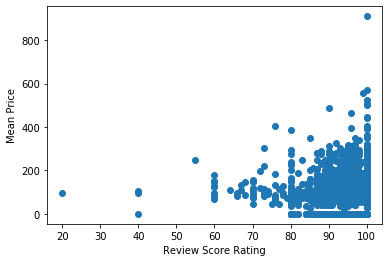

In [24]:
plt.scatter(apartment_data["review_scores_rating"],[apartment_data["Mean Price"]])
plt.xlabel('Review Score Rating')
plt.ylabel('Mean Price')
plt.show()

In [25]:
#Scatter scatter plot
#reviews =list(Seattle_listing_df["review_scores_rating"])
#price = list( Seattle_listing_df["Mean Price"])


reviews = Boston_listing_df.iloc[:,8]
price =  Boston_listing_df.iloc[:,9]


#print(price)
corelation = st.pearsonr(reviews, price)
print(f"The corelation between both factor is {round(corelation[0],2)}")
corelation

NameError: name 'Boston_listing_df' is not defined

In [ ]:
plt.scatter(Seattle_listing_df["review_scores_rating"],[Seattle_listing_df["Mean Price"]])
plt.xlabel('reviews')
plt.ylabel('price')
print(f"The corelation between both factor is {round(corelation[0],2)}")
plt.show()

In [ ]:
Seattle_review_file ="c://Learn//Project1//Resources//Seattle_reviews2.csv"
df3 =pd.read_csv(Seattle_review_file,names=Seattle_reviews1_df.columns)

df3.head()

In [ ]:
combined_reviews_df4 = pd.concat([df2,df3])
combined_reviews_df4.head()

In [ ]:
df2.shape

In [ ]:
df3.shape

In [26]:
combined_reviews_df4.shape

NameError: name 'combined_reviews_df4' is not defined

In [ ]:
print("started")

x= np.arange(1,13,1
y = [185,190,195,200,205,210,215,220,225,230,235,240]

plt.plot(['x','y'])
#plt.line(df_final_Seattle.iloc[:,6],[df_final_Seattle.iloc[:,3]])
plt.xlabel('month')
plt.ylabel('price')
plt.title("month vs price")
plt.show()
print("finished")

In [ ]:
month = df_final_Seattle.iloc[:,6]
price = df_final_Seattle.iloc[:,3]
#print(price)
corelation = st.pearsonr(month, price)
print(f"The corelation between both factor is {round(corelation[0],2)}")


In [ ]:
plt.scatter(df_final_Seattle["month"],[df_final_Seattle["price"]])
plt.xlabel('month')
plt.ylabel('price')
print(f"The corelation between both factor is {round(corelation[0],2)}")
plt.show()